DSC550<br>
1/14/2021<br>
Michael Hotaling

# Titanic Tutorial Part 1: Graphics Analysis

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Step 1:  Load the data from the “train.csv” file into a DataFrame.


In [2]:
data = pd.read_csv("train.csv")

### Step 2:	Display the dimensions of the file (so you’ll have a good idea the amount of data you are working with.)


In [3]:
print("There are {} rows and {} columns in this dataframe".format(data.shape[0], data.shape[1]))

There are 891 rows and 12 columns in this dataframe


###  Step 3: Display the first 5 rows of data so you can see the column headings and the type of data for each column.

- Notice that Survived is represented as a 1 or 0
- Notice that missing data is represented as “NaN”
- The Survived variable will be the “target” and the other variables will be the “features”


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 4:	Think about some questions that might help you predict who will survive:
- What do the variables look like? For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are they in different categories?

| Variable    | Definition                                      | Key                                                                                |
|-------------|-------------------------------------------------|------------------------------------------------------------------------------------|
| PassengerID |                                                 |                                                                                    |
| Survived    | Survival                                        | 0 = No, 1 = Yes                                                                    |
| Pclass      | Ticket class                                    | 1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class                                        |
| Name        | Name of the Passenger                           |                                                                                    |
| Sex         | Sex                                             |                                                                                    |
| Age         | Age in Years                                    | Age is a fractional if less than 1. If age is estimated, it is in the form of xx.5 |
| SibSp       | Number of siblings / spouses aboard the Titanic | brother, sister, stepbrother, stepsister, husband, wife                            |
| Parch       | Number of parents / children aboard the Titanic | mother, father, daughter, son, stepdaughter, stepson                               |
| Ticket      | Ticket Number                                   |                                                                                    |
| Fare        | Passenger Fare                                  |                                                                                    |
| Cabin       | Cabin Number                                    |                                                                                    |
| Embarked    | Port of Embarkation                             | C = Cherbourg, Q = Queenstown, S = Southampton                                     |                                       |


- Are the numerical variables correlated?

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_data = data.select_dtypes(include=['int64', 'float64'])
numerical_data.corr().style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Not really. The strongest correlations are with Pclass and Fare, which makes sense since upper class tickets will be more money. Age is also correlated with Pclass and SibSp since many families were travelling together and larger families tended to be poorer


- Are the distributions of numerical variables the same or different among survived and not survived? Is the survival rate different for different values? For example, were people more likely to survive if they were younger?

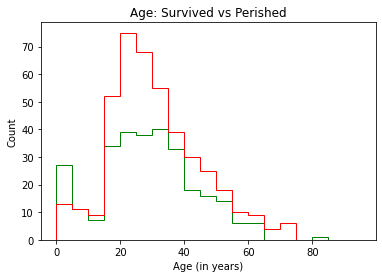

In [6]:
survived_df = data[data['Survived'] == 1]
died_df = data[data['Survived'] == 0]

plt.hist(survived_df['Age'], bins = np.arange(0,100,5), color = "green", histtype = "step")
plt.hist(died_df['Age'], bins = np.arange(0,100,5), color = "red", histtype = "step")
plt.title('Age: Survived vs Perished')
plt.xlabel("Age (in years)")
plt.ylabel("Count")
plt.show()

It's hard to draw conclusions based on the graphs alone, but age doesn't seem to be a large factor whether someone were to survive or not. Class on the other hand is a strong factor. If someone was in 3rd Class, they were much more likely to perish

- Are there different survival rates in different categories? For example, did more women survived than man?

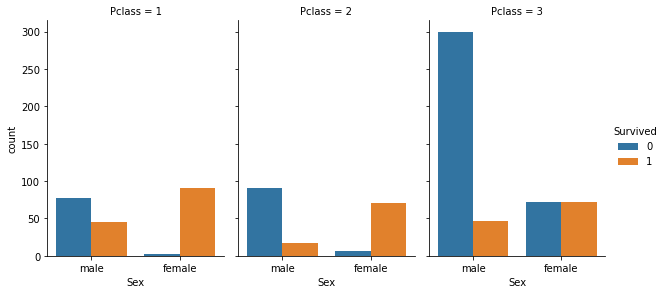

In [7]:
sns.catplot(x="Sex", hue="Survived", col="Pclass",
                data=data, kind="count",
                height=4, aspect=.7);

We have a strong visual correlation between survivability vs sex as well as surivivability and class. Men were much more likely to perish compared to women and men in third class were very likely to perish

### Step 5: Look at summary information about your data (total, mean, min, max, freq, unique, etc.)  Does this present any more questions for you?  Does it lead you to a conclusion yet?  

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"West, Mr. Edwy Arthur",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


No conclusions yet. We can see that most of our tickets were purchased for under \\$30, but we have a strange outlier at \\$512. We also have 3 unique embarking locations in our data. 

### Step 6: Make some histograms of your data (“A picture is worth a thousand words!”)
-	Most of the passengers are around 20 to 30 years old and don't have siblings or relatives with them. A large amount of the tickets sold were less than \\$50. There are very few tickets sold where the fare was over \\$500.


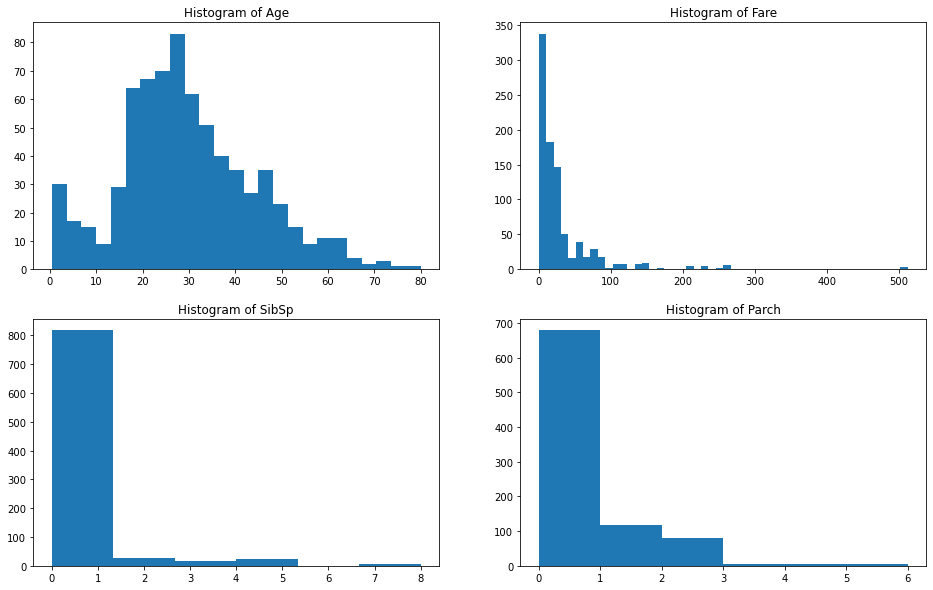

In [10]:
import matplotlib.pyplot as plt

fig, ((ax1,ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(16,10))
ax1.hist(data['Age'], bins = 25)
ax1.title.set_text('Histogram of Age')

ax2.hist(data['Fare'], bins = 50)
ax2.title.set_text('Histogram of Fare')

ax3.hist(data['SibSp'], bins = max(data['Parch']))
ax3.title.set_text('Histogram of SibSp')

ax4.hist(data['Parch'], bins = max(data['Parch']))
ax4.title.set_text('Histogram of Parch')

### Step 7: Make some bar charts for variables with only a few options.
- Ticket and Cabin have more than 100 variables so don’t do those!


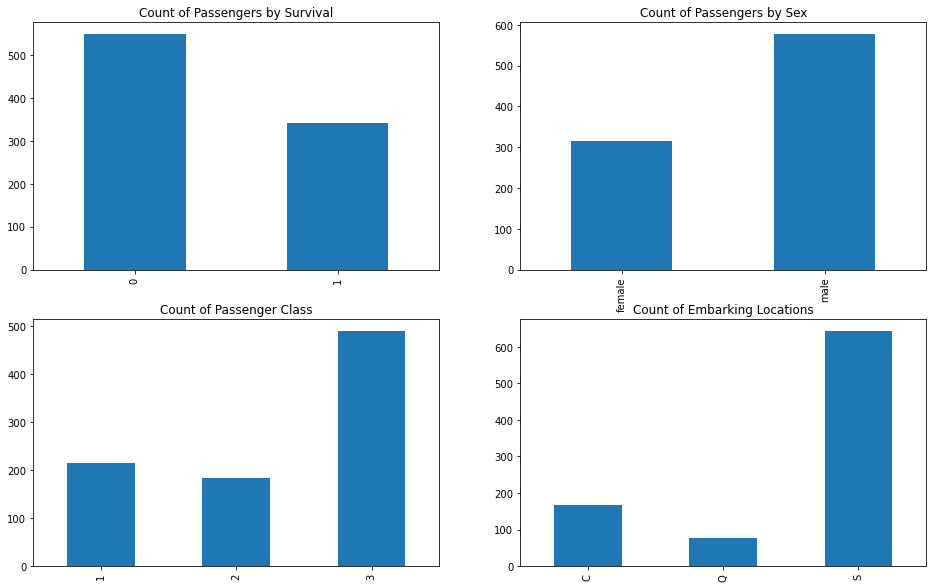

In [11]:
import matplotlib.pyplot as plt

fig, ((ax1,ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(16,10))

data['Survived'].value_counts().sort_index().plot(kind='bar', ax=ax1)
ax1.title.set_text('Count of Passengers by Survival')

data['Sex'].value_counts().sort_index().plot(kind='bar', ax=ax2)
ax2.title.set_text('Count of Passengers by Sex')

data['Pclass'].value_counts().sort_index().plot(kind='bar', ax=ax3)
ax3.title.set_text('Count of Passenger Class')

data['Embarked'].value_counts().sort_index().plot(kind='bar', ax=ax4)
ax4.title.set_text('Count of Embarking Locations')

### Step 8: To see if the data is correlated, make some Pearson Ranking charts
- Notice that in my sample code, I have saved this png file.
- The correlation between the variables is low (1 or -1 is high positive or high negative, 0 is low or no correlation)  These results show there is “some” positive correlation but it’s not a high correlation.


In [12]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])
numerical_data.corr().style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Step 9: Use Parallel Coordinates visualization to compare the distributions of numerical variables between passengers that survived and those that did not survive.
- That’s a cool chart, isn’t it?!  Passengers traveling with siblings on the boat have a higher death rate and passengers who paid a higher fare had a higher survival rate


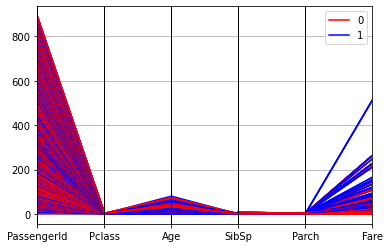

In [13]:
pd.plotting.parallel_coordinates(numerical_data, 'Survived', color = ["red","blue"]);

In [14]:
numerical_data = numerical_data.drop(['PassengerId'], axis = 1)

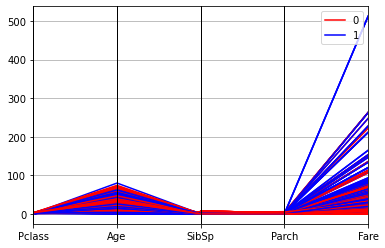

In [15]:
pd.plotting.parallel_coordinates(numerical_data, 'Survived', color = ["red","blue"]);

### Step 10) Use Stack Bar Charts to compare passengers who survived to passengers who didn’t survive based on the other variables.

- More females survived than men.  3rd Class Tickets had a lower survival rate.  
- Embarkation from Southampton port had a lower survival rate.


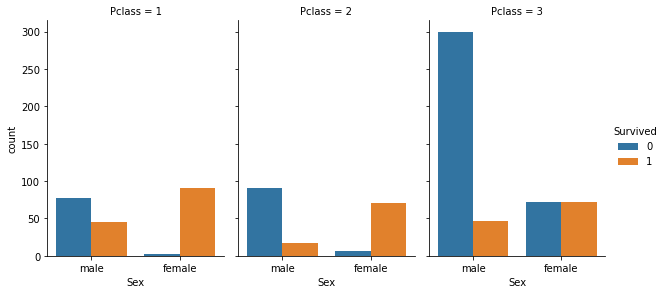

In [16]:
sns.catplot(x="Sex", hue="Survived", col="Pclass",
                data=data, kind="count",
                height=4, aspect=.7, );

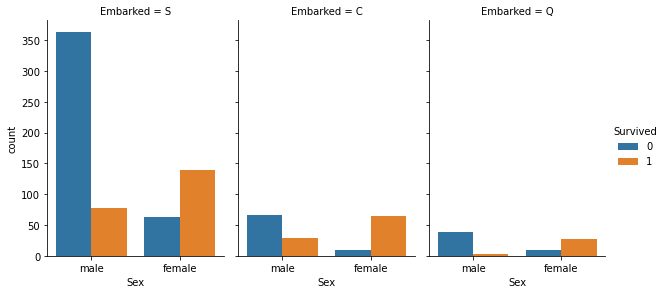

In [17]:
sns.catplot(x="Sex", hue="Survived", col="Embarked",
                data=data, kind="count",
                height=4, aspect=.7, );

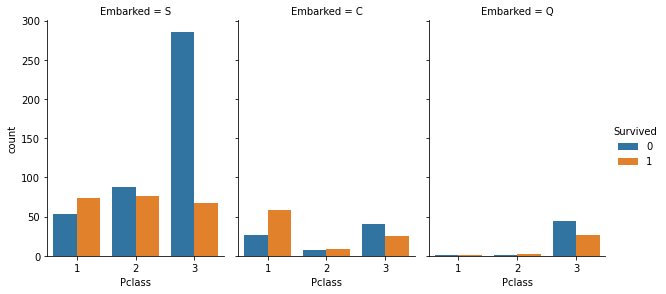

In [18]:
sns.catplot(x="Pclass", hue="Survived", col="Embarked",
                data=data, kind="count",
                height=4, aspect=.7, );

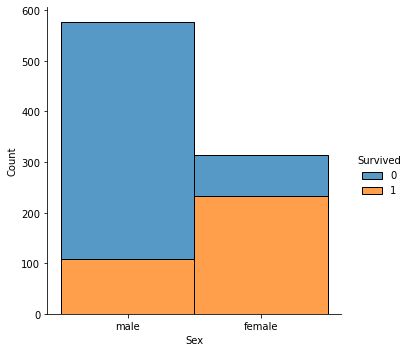

In [19]:
sns.displot(data, x='Sex', hue='Survived', multiple='stack');